# Bands of a photonic crystal slab

In this short example, we will demonstrate how Legume can be used to compute the bands of a photonic crystal slab. We will consider a slab design that is very close to one from the book [Molding the Flow of Light](http://ab-initio.mit.edu/book/).

First we will import the `legume` package:

In [161]:
import legume
import numpy as np
import matplotlib.pyplot as plt

We will then define the parameters of our structure: $D$ is the thickness of the slab, $r$ is the radius of the air hole, and `epsr` is the permittivity.

In [162]:
a=1

dslab = 0.6
eps = 12
ra = 0.3

a1 = np.array([a*0.5, a*np.sqrt(3)/2])
a2 = np.array([a*0.5, -a*np.sqrt(3)/2])

Next, we construct the lattice, the photonic crystal object, and the GME object:

In [163]:
lattice = legume.Lattice(a1,a2)
phc = legume.PhotCryst(lattice)
phc.add_layer(d=dslab, eps_b=12)
phc.layers[-1].add_shape(legume.Circle(eps=1.0, r=ra))
gme = legume.GuidedModeExp(phc, gmax=6)

We can then use the `legume.viz` module to visualize our photonic crystal slab across three planes through the unit cell:

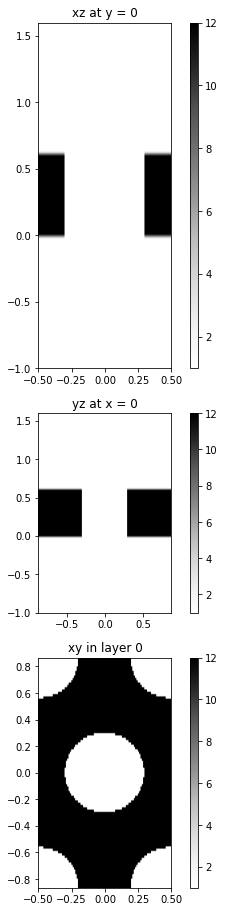

In [164]:
legume.viz.structure(phc, xz=True, yz=True, figsize=3.)

Finally, we can solve for the bands of the photonic crystal. Note that here we are solving for only the modes with *TE-like* polarization because we have `gmode_inds=[0]`.

In [165]:
path = lattice.bz_path([[0,0], [np.pi, np.pi/np.sqrt(3)], [4/3*np.pi, 0], [0,0]], [15, 10, 15])
gme.run(kpoints=path['kpoints'],
        gmode_inds=[0,3],
        numeig=10,
        verbose=False)

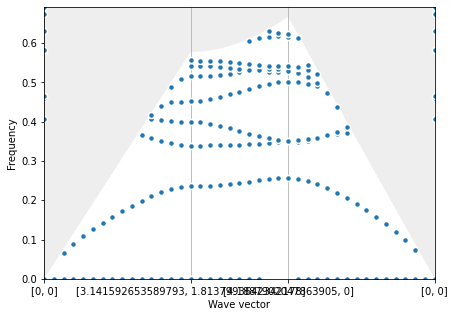

In [166]:
k_squared = np.tile((gme.kpoints[0]**2+gme.kpoints[1]**2)**(1/2), (10, 1)).T


gme._freqs = gme._freqs*(gme._freqs/(k_squared-0.03+1e-12) <= 1/(2*np.pi))
fig, ax = plt.subplots(1, figsize = (7, 5))
legume.viz.bands(gme, figsize=(5,5), Q=False, ax=ax)
ax.set_xticks(path['indexes'])
ax.set_xticklabels(path['labels'])
ax.xaxis.grid('True')

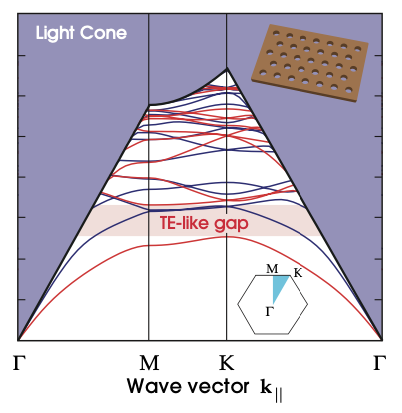

We observe excellent agreement with the bands shown in the text book (red lines).